In [44]:
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.side_channel import SideChannel, IncomingMessage, OutgoingMessage
import uuid

class HyperParametersSideChannel(SideChannel):
    def __init__(self):
        super().__init__(uuid.UUID("1a2b3c4d-5e6f-7a8b-9c0d-1e2f3a4b5c6d"))  # Use the same UUID as in your Unity C# code
        self.received_data = []  # Store the received data here

    def on_message_received(self, msg: IncomingMessage) -> None:
        count = msg.read_int32()
        float_list = [msg.read_float32() for _ in range(count)]
        # Process the received list of floats as needed
        self.received_data = float_list  # Store the received data
    def send_hyperparameters(self, float_list):
        msg = OutgoingMessage()
        msg.write_int32(len(float_list))  # Write the count of float values
        for value in float_list:
            msg.write_float32(value)  # Write each float value
        self.queue_message_to_send(msg)

# Create the FloatListSideChannel
hyperparametersChannel = HyperParametersSideChannel()
alphaThreshold = 0.1 
cf0 = 1/20 
bf0 = 1/20
du = 1.5
rewardWeights = [1.0,1.0,1.0,1.0,1.0,1.0]
hyperparameters = [10,alphaThreshold, cf0, bf0, du,] + rewardWeights # Replace with your own data
hyperparametersChannel.send_hyperparameters(hyperparameters)
# Start the communication with the Unity Editor and pass the float_list_channel as input
env = UnityEnvironment(file_name='/Users/amineandam/Desktop/OutputSecurityEnv/EnvS.app',side_channels=[hyperparametersChannel])
#hyperparametersChannel.send_hyperparameters(hyperparameters)
env.reset()

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [21]:
env.close()

In [45]:
behavior_names = env.behavior_specs.keys()
list(behavior_names)

['Filter?team=0']

In [46]:
behavior_name = list(behavior_names)[0]
spec = env.behavior_specs[behavior_name]
spec

BehaviorSpec(observation_specs=[ObservationSpec(shape=(256, 256, 3), dimension_property=(<DimensionProperty.TRANSLATIONAL_EQUIVARIANCE: 2>, <DimensionProperty.TRANSLATIONAL_EQUIVARIANCE: 2>, <DimensionProperty.NONE: 1>), observation_type=<ObservationType.DEFAULT: 0>, name='CameraSensor'), ObservationSpec(shape=(148,), dimension_property=(<DimensionProperty.NONE: 1>,), observation_type=<ObservationType.DEFAULT: 0>, name='VectorSensor_size148')], action_spec=ActionSpec(continuous_size=124, discrete_branches=()))

In [47]:
print("Number of observations : ", len(spec.observation_specs))

# Is there a visual observation ?
# Visual observation have 3 dimensions: Height, Width and number of channels
vis_obs = any(len(spec.shape) == 3 for spec in spec.observation_specs)
print("Is there a visual observation ?", vis_obs)

Number of observations :  2
Is there a visual observation ? True


In [48]:
decision_steps, terminal_steps = env.get_steps(behavior_name)

In [49]:
visualObs = decision_steps[0].obs[0]
#visualObs = np.transpose(visualObs, (2, 0, 1))
numObs = decision_steps.obs[1]

In [28]:
visualObs.shape

(256, 256, 3)

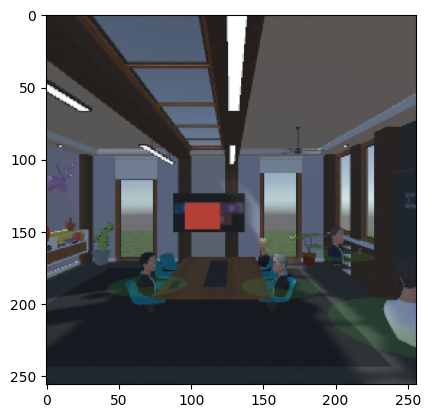

In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(visualObs)
plt.show()

In [51]:
env.reset()

In [60]:
for episode in range(5):
  env.reset()
  decision_steps, terminal_steps = env.get_steps(behavior_name)
  tracked_agent = -1 # -1 indicates not yet tracking
  done = False # For the tracked_agent
  episode_rewards = 0 # For the tracked_agent
  h = 0
  while (h<5):
    print(h)
    h+=1
    # Track the first agent we see if not tracking
    # Note : len(decision_steps) = [number of agents that requested a decision]
    if tracked_agent == -1 and len(decision_steps) >= 1:
      tracked_agent = decision_steps.agent_id[0]

    # Generate an action for all agents
    action = spec.action_spec.random_action(len(decision_steps))

    # Set the actions
    env.set_actions(behavior_name, action)

    # Move the simulation forward
    
    env.step()
    print(decision_steps[tracked_agent].reward)


    # Get the new simulation results
    decision_steps, terminal_steps = env.get_steps(behavior_name)
    if tracked_agent in decision_steps: # The agent requested a decision
      episode_rewards += decision_steps[tracked_agent].reward
    if tracked_agent in terminal_steps: # The agent terminated its episode
      episode_rewards += terminal_steps[tracked_agent].reward
      done = True
  print(f"Total rewards for episode {episode} is {episode_rewards}")

0
-7661.2075
1
-47264.45
2
-30716.06
3
-2152.9976
4
-5775.0693
Total rewards for episode 0 is -94890.47509765625
0
-1827.9009
1
-8878.097
2
-7304.047
3
-10736.081
4
-6554.64
Total rewards for episode 1 is -34353.06018066406
0
-5.464312
1
-206.31427
2
-3800.9834
3
-10890.325
4
-7312.938
Total rewards for episode 2 is -36446.91046142578
0
-7097.5645
1
-40679.85
2
-61636.605
3
-79858.86
4
-71251.51
Total rewards for episode 3 is -314163.390625
0
-15967.512
1
-91020.78
2
-88255.47
3
-78049.35
4
-78453.85
Total rewards for episode 4 is -398805.66796875


In [59]:
env.reset()

In [58]:
action = spec.action_spec.random_action(len(decision_steps))

    # Set the actions
env.set_actions(behavior_name, action)

    # Move the simulation forward
    
env.step()

In [43]:
env.close()